In [8]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
if (!require("stringr")) install.packages("stringr")
library('stringr')

# Classification of Customer Type 

## Introduction: 
Supermarket sales are often in high competition due to the demand for their resources. This dataset aims to examine data from a supermarket company with three distinctive branches. The data has been collected in a three month time period. The plan of action is to analyze supermarket sales of three different branches and predict whether a new customer will be a store member or not by the use of multiple variables. 

## Methods: 
To predict whether a new customer will be a store member or not will be done by various variables provided by the dataset. The variables that will be utilized will be gender, product line (categorization groups of items), and, customer satisfaction rating, total price of invoice (which includes unit price, quantity, and 5% tax). Visualization of the data could be done through the use of ___________. 


## Expected outcomes and significance: 
The prediction is to estimate whether a new customer will sign up for a membership or not. This example of classification could help supermarkets analyze what the threshold is for people to spend on products and get a membership for the store. Customer type prediction could lead to future questions regarding which variable is the most effective one when predicting customer type. 


In [9]:
supermarket <- read_csv('supermarket_sales.csv')
    names(supermarket) <- str_replace_all(names(supermarket), " ", "_")

supermarket_sales <- supermarket%>%
    mutate(Customer_type = as_factor(Customer_type), Gender = as_factor(Gender), Product_line = as_factor(Product_line))

supermarket_sales%>%
    slice(n = 1:10)

Parsed with column specification:
cols(
  `Invoice ID` = col_character(),
  Branch = col_character(),
  City = col_character(),
  `Customer type` = col_character(),
  Gender = col_character(),
  `Product line` = col_character(),
  `Unit price` = col_double(),
  Quantity = col_double(),
  `Tax 5%` = col_double(),
  Total = col_double(),
  Date = col_character(),
  Time = col_time(format = ""),
  Payment = col_character(),
  cogs = col_double(),
  `gross margin percentage` = col_double(),
  `gross income` = col_double(),
  Rating = col_double()
)



Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15:00,Credit card,72.52,4.761905,3.6260,7.2


In [10]:
set.seed(1)
supermarket_split <- initial_split(supermarket_sales, prop = 0.70, strata = Customer_type) 
supermarket_train <- training(supermarket_split)
supermarket_test <- testing(supermarket_split)

supermarket_train

Invoice_ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,Tax_5%,Total,Date,Time,Payment,cogs,gross_margin_percentage,gross_income,Rating
<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15:00,Credit card,72.52,4.761905,3.6260,7.2
692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.2260,5.9


In [13]:
supermarket_data <- supermarket_train%>%
    filter(Branch == 'A')%>%
    select(Customer_type, Gender, Product_line, Total, Rating)
supermarket_data


Customer_type,Gender,Product_line,Total,Rating
<fct>,<fct>,<fct>,<dbl>,<dbl>
Normal,Male,Home and lifestyle,340.5255,7.4
Member,Male,Health and beauty,489.0480,8.4
Normal,Male,Sports and travel,634.3785,5.3
Member,Female,Electronic accessories,433.6920,5.8
Member,Female,Health and beauty,76.1460,7.2
Normal,Female,Electronic accessories,246.4875,7.1
Normal,Male,Food and beverages,453.4950,8.2
Normal,Female,Health and beauty,749.4900,5.7
Member,Female,Health and beauty,506.6355,4.6


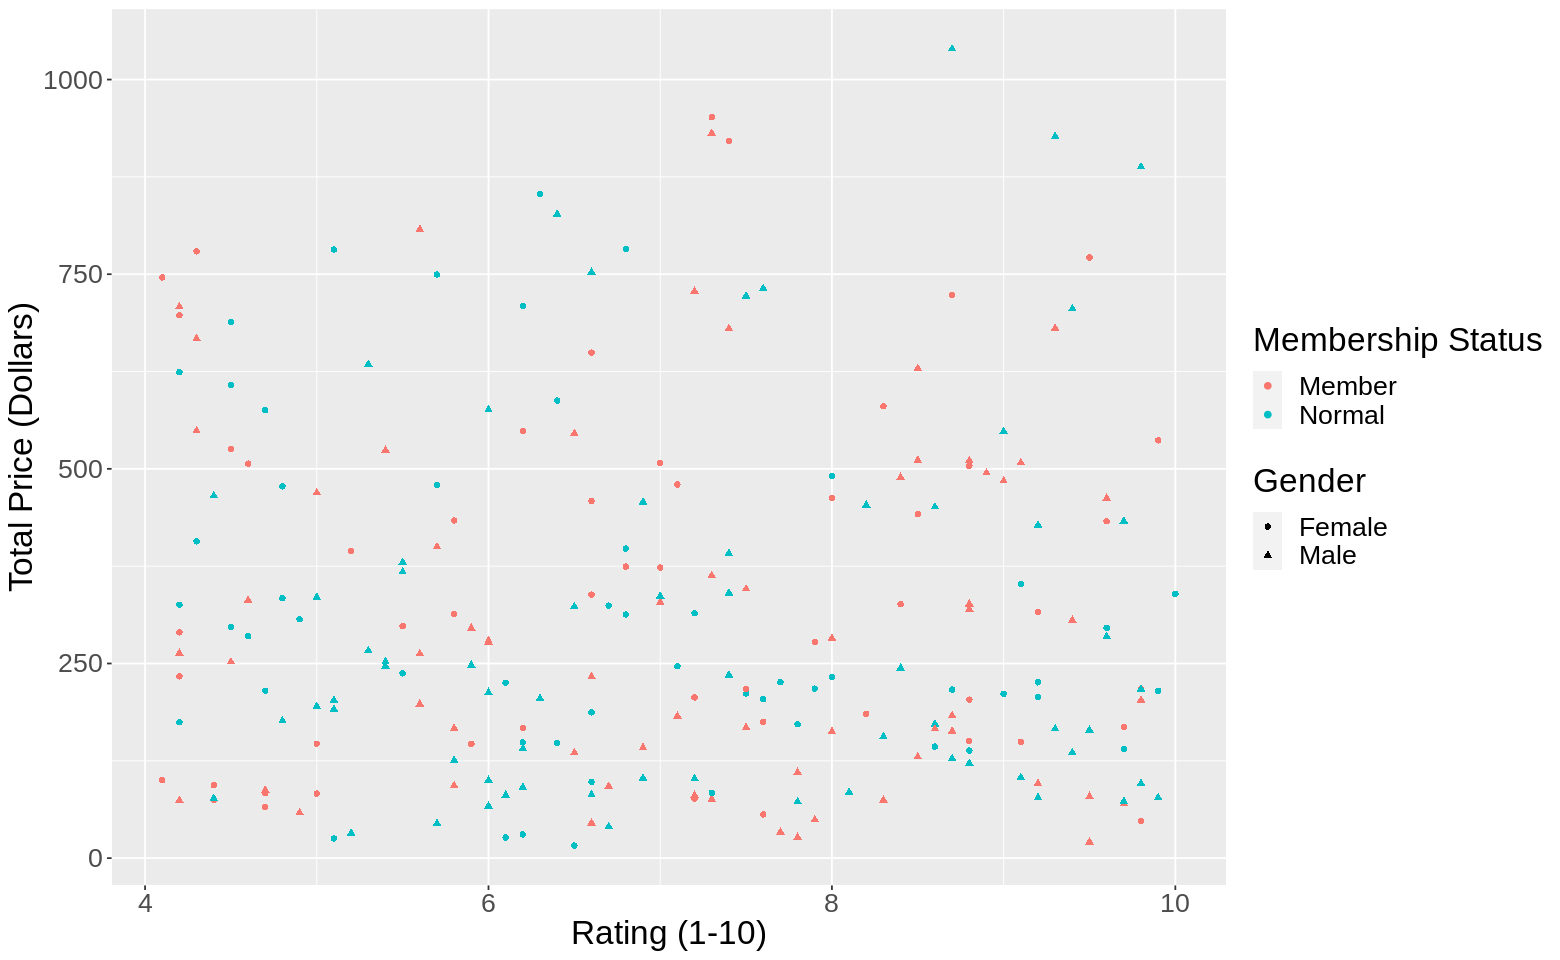

In [23]:
options(repr.plot.width = 13, repr.plot.height = 8) 

supermarket_plot<-ggplot(supermarket_data, aes(x=Rating,y=Total,color=Customer_type,shape=Gender))+
                geom_point()+
                labs(x="Rating (1-10)",y="Total Price (Dollars)",color="Membership Status",shape="Gender")+
                theme(text=element_text(size=20))
supermarket_plot